In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

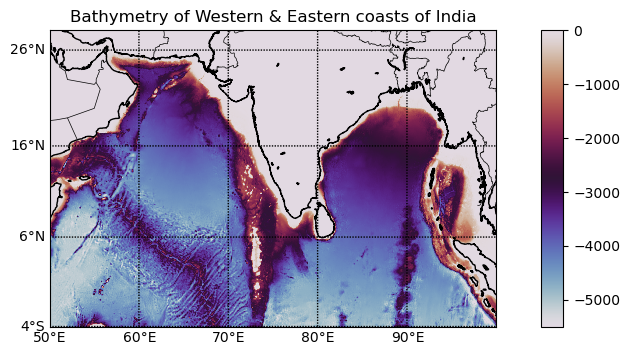

In [9]:
data = Dataset(r'C:\Users\pavan\Downloads\OCEAN\netCDF\etopo1_bedrock_global_relief_model_topography_bathymetry.nc', 'r')
data.variables['B_BATHY']

lats = data.variables['LAT5161_7081'][:]
lons = data.variables['LON13801_16801'][:]
bathy = data.variables['B_BATHY'][:]

mp = Basemap(projection = 'merc', 
             llcrnrlon =  50,
             llcrnrlat =   -4,
             urcrnrlon =  100,
             urcrnrlat =  28, 
             resolution = 'i')

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
    

c_scheme = mp.pcolor(x, y, np.squeeze(bathy[0,:,:]), cmap = 'twilight')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp.drawparallels(np.arange(-4, 28, 10), labels = [1,0,0,0])
mp.drawmeridians(np.arange(50, 100, 10), labels = [0,0,0,1])

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
plt.title('Bathymetry of Western & Eastern coasts of India')
plt.clim(-5500, 0)
plt.savefig(r'C:\Users\pavan\Downloads\OCEAN\netCDF\Bathy.'+'jpg')
#plt.clf()
plt.grid(True)
plt.tight_layout()
plt.show()